In [1]:
%cd ..

/home/ubuntu/OptiServe


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import itertools
import boto3
import json
import os

from src.modeling.application_performance_modeling import ApplicationPerformanceModeling
from src.analytics.aws_function_logs import AWSFunctionLogs
from src.profiler.cost_calculator import CostCalculator
from src.modeling.function_performance_modeling import FunctionPerformanceModeling
from src.optimizer.application_optimizer import ApplicationOptimizer

In [3]:
apps = [
    'App1',
    'App2',
    'App3',
    'App4',
    'App5',
    'App6',
]

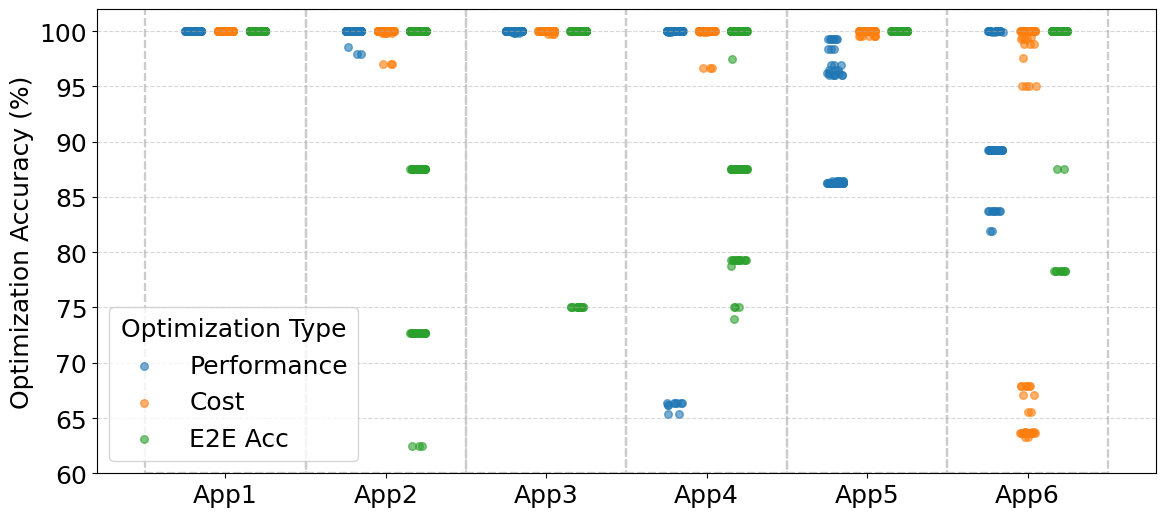

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as patches


# Define parameters
clusters = apps
opt_types = ['Performance', 'Cost', 'E2E Acc']

map_opt_to_name = {
    'Performance': 'BPBC',
    'Cost': 'BCPC',
    'E2E Acc': 'BAPB'
}

data = {
    (i, j): np.load(f"{apps[i]}_{map_opt_to_name[list(map_opt_to_name.keys())[j]]}_accuracy.npy")
    for i in range(len(clusters))
    for j in range(len(opt_types))
}

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
x = np.arange(len(clusters))

# Define consistent colors for each optimization type
colors = ['tab:blue', 'tab:orange', 'tab:green']

for j, opt_type in enumerate(opt_types):
    for i, cluster in enumerate(clusters):
        x_center = i + (j - 1) * bar_width
        y_values = data[(i, j)]
        y_values = y_values[y_values != 0]
        x_jittered = x_center + np.random.uniform(-0.05, 0.05, size=len(y_values))
        ax.scatter(x_jittered, y_values, alpha=0.6, s=30, color=colors[j], label=opt_type if i == 0 else "")
        rect = patches.Rectangle((i - 0.5, 60), 1, 42, linewidth=1.5,
                             edgecolor=(0.8, 0.8, 0.8), facecolor='none', linestyle='--')
        ax.add_patch(rect)

ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.set_ylabel("Optimization Accuracy (%)")

ax.set_ylim(60, 102)

ax.legend(
    title="Optimization Type",
    loc="lower left",
    bbox_to_anchor=(0.0, 0.0),  # (x, y) relative to axes
)

plt.rcParams.update({'font.size': 18})  # Set global default font size

ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig("optimization-accuracy.pdf", format="pdf", bbox_inches="tight")
plt.show()
